### Import Libraries


In [1]:
import numpy                       
from matplotlib import pyplot                 
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

### Linear Convection, Wave speed c

### Grid

In [2]:
nx = 81  #number of space points
dx = 2/(nx-1) #spacing between points

CFL  = 1
nt = 25 #number of time steps

L = 2 # computational domain

x = numpy.linspace(0,L,nx)  #grid generation

#wave number:
c = 1

nt = 25 #number of time steps
dt = CFL*dx*c #time step increment

### Initial Conditions

In [3]:
u = numpy.ones(nx)  #since u is 1 initially in domain except (0.5<=x<=1)

print(numpy.shape(u))

#The idea is to fill the array and slice it and assign  u =2 at the upper and lower bounds:

lb = numpy.where(x >= 0.5)
ub = numpy.where(x <= 1)

(81,)


In [4]:
print(lb)
print(ub)

(array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40]),)


In [5]:
# to slice the array we use:
#?numpy.intersect1d

In [6]:
bounds = numpy.intersect1d(lb,ub)

print(bounds)

[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


In [7]:
u[bounds] = 2 #assign a value of two in the interval specified

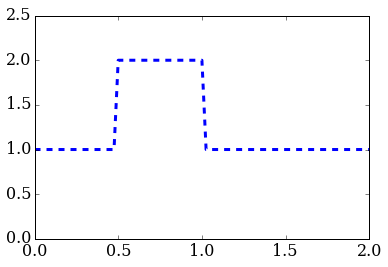

In [8]:
# Look at initial conditions:

pyplot.plot(x, u, color='b', ls='--', lw=3)
pyplot.ylim(0,2.5);

In [9]:
test = numpy.where(x==0.5)
print(test)

(array([20]),)


In [10]:
u[10], u[9], x[10], x[9]

(1.0, 1.0, 0.25, 0.22500000000000001)

#### Adding more points to make the space grid finer creates a more "square" wave function. When using nx = 41 as opposed to 81, the square wave and solution below look less like a top hat.

### Solve

In [11]:
for n in range(1, nt):
    un = u.copy()
    
    for i in range(1,nx):
        u[i] = un[i] - c*dt/dx*(un[i]-un[i-1])

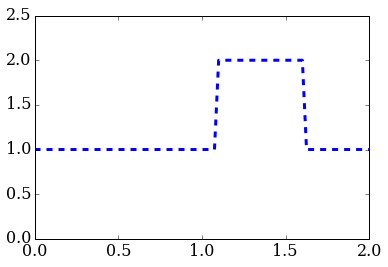

In [12]:
# Look at solution:

pyplot.plot(x, u, color='b', ls='--', lw=3)
pyplot.ylim(0,2.5);

#### With more gridpoints this solution maintains the original top hat shape (with less points it appears more like a rolling hill!)

### Non-Linear Convection, Wave Speed u

In [13]:
#CFL=0.5

In [14]:
# Number of space points and time steps:
nx = 80
dx = 2/(nx-1)
nt = 10
#dt = CFL*dx*c
dt = 0.02

x = numpy.linspace(0,L,nx)  #grid generation

lb = numpy.where(x >= 0.5)
ub = numpy.where(x <= 1)

### Initial Conditions

In [15]:
u = numpy.ones(nx)      
u[numpy.intersect1d(lb, ub)]=2 

### Plot I.C

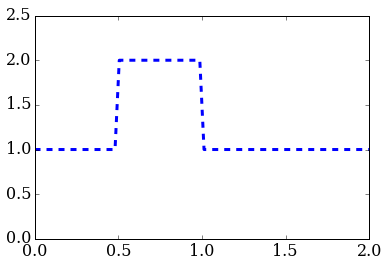

In [16]:
pyplot.plot(x, u, color='b', ls='--', lw=3)
pyplot.ylim(0,2.5);

### Solve

In [17]:
for n in range(1, nt):  
    un = u.copy() 
    u[1:] = un[1:]-un[1:]*dt/dx*(un[1:]-un[0:-1]) 
    u[0] = 1.0

### Plot

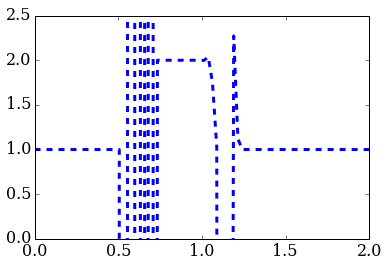

In [20]:
pyplot.plot(x, u, color='b', ls='--', lw=3)
pyplot.ylim(0,2.5);

#### Note that changing nx to 81 in the nonlinear method causes instability in the solution, which leads to the next notebook (cfl and stability).